<h1 style="color:teal; font-size:45px; font-family:'Verdana', sans-serif; font-weight:bold; margin-bottom: 5px;">
Rapport - Projet Machine Learning
</h1>

<p style="color:#444; font-size:12px; font-family:'Verdana', sans-serif; border-bottom: 3px solid #2980b9; padding-bottom: 10px; font-weight:bold; margin-top: 0px;">
Dataset - Gym membership
</p>
<p style="font-size:16px; font-family:'Verdana'; color:#34495e; margin-top: 0px; text-align: right;">
EHRHART Elsa, HOSSEINI Arman, SLISSE Paul, STAUB Guillaume
</p>

<div style="margin-top: 100px;">
</div>
<div style="border-left: 6px solid #2980b9; background-color: #f0f8ff; padding: 15px; margin: 20px 0; font-family:Verdana; font-size:16px;">
<h2 style="color:#2980b9; ">Sommaire</h2>
<ul style="list-style-type: none; padding-left: 0;">
    <li><a href="#chap1" style="color:#2c3e50; text-decoration: none;"><strong>1. Pré-processing des données</strong></a></li>
    <li><a href="#reg" style="color:#2c3e50; text-decoration: none;"><strong>2. Prédiction des calories brûlées - Régression</strong></a></li>
    <ul style="list-style-type: circle; padding-left: 60px;">
        <li><a href="#rlt" style="color:#2c3e50; text-decoration: none;">2.1 Régression linéaire avec modèle complet</a></li>
        <li><a href="#rlfs" style="color:#2c3e50; text-decoration: none;">2.2 Régression linéaire avec forward selection</a></li>
        <li><a href="#rlasso" style="color:#2c3e50; text-decoration: none;">2.3 Régression Lasso</a></li>
        <li><a href="#knn" style="color:#2c3e50; text-decoration: none;">2.4 KNN</a></li>
        <li><a href="#svr" style="color:#2c3e50; text-decoration: none;">2.5 SVR</a></li>
        <li><a href="#tree" style="color:#2c3e50; text-decoration: none;">2.6 Arbres</a></li>
        <li><a href="#rtree" style="color:#2c3e50; text-decoration: none;">2.7 Foêts Aléatoires</a></li>
        <li><a href="#gbr" style="color:#2c3e50; text-decoration: none;">2.8 Gradient Boosting</a></li>
        <li><a href="#nnet" style="color:#2c3e50; text-decoration: none;">2.9 Réseaux de Neurones</a></li>
        <li><a href="#recap" style="color:#2c3e50; text-decoration: none;">2.10 Tableau Récapitulatif</a></li>
</ul>
<li><a href="#class" style="color:#2c3e50; text-decoration: none;"><strong>3. Prédiction du niveau d'expérience - Classification</strong></a></li>
        <ul style="list-style-type: circle; padding-left: 60px;">
        <li><a href="#rlsp" style="color:#2c3e50; text-decoration: none;">3.1 Régression linéaire sans pénalisation</a></li>
        <li><a href="#rlp" style="color:#2c3e50; text-decoration: none;">3.2 Régression avec pénalisation L1</a></li>
        <li><a href="#km" style="color:#2c3e50; text-decoration: none;">3.3 K-Means</a></li>
        <li><a href="#knnc" style="color:#2c3e50; text-decoration: none;">3.4 KNN</a></li>
        <li><a href="#svm" style="color:#2c3e50; text-decoration: none;">3.5 SVM</a></li>
        <li><a href="#treec" style="color:#2c3e50; text-decoration: none;">3.6 Arbres binaires de décision</a></li>
        <li><a href="#rtreec" style="color:#2c3e50; text-decoration: none;">3.7 Foêts Aléatoires</a></li>
        <li><a href="#gbc" style="color:#2c3e50; text-decoration: none;">3.8 Gradient Boosting</a></li>
        <li><a href="#nnetc" style="color:#2c3e50; text-decoration: none;">3.9 Réseaux de Neurones</a></li>
        <li><a href="#roc" style="color:#2c3e50; text-decoration: none;">3.10 Courbes ROC</a></li>
</ul>
</div>

<div id="chap1"></div>
<h2 style="color:#2980b9; font-size:32px; font-family:'Trebuchet MS', sans-serif; margin-top:30px;">
    1. Pré-processing des données
</h2>
<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6;">Nous allons ici répéter les actions effectuées dans le <span style="background-color:lightgray;">Notebook R</span> parties <span style="font-weight:bold;">1.1</span>, <span style="font-weight:bold;">1.2</span> et <span style="font-weight:bold;">1.3</span> afin de préparer nos données.</p>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
path="./gym_members_exercise_tracking.csv"
gym=pd.read_csv(path,sep=",",header=0)
gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [9]:
gym["Gender"]=pd.Categorical(gym["Gender"],ordered=False)
gym["Workout_Type"]=pd.Categorical(gym["Workout_Type"],ordered=False)
gym["Experience_Level"]=pd.Categorical(gym["Experience_Level"],ordered=True)
gym.dtypes

Age                                 int64
Gender                           category
Weight (kg)                       float64
Height (m)                        float64
Max_BPM                             int64
Avg_BPM                             int64
Resting_BPM                         int64
Session_Duration (hours)          float64
Calories_Burned                   float64
Workout_Type                     category
Fat_Percentage                    float64
Water_Intake (liters)             float64
Workout_Frequency (days/week)       int64
Experience_Level                 category
BMI                               float64
dtype: object

In [10]:
gym["LWeight"]=gym["Weight (kg)"].map(lambda x:np.log(x))
gym["LBMI"]=gym["BMI"].map(lambda x:np.log(x))
del gym["Weight (kg)"]
del gym["BMI"]
gym.head()

,Age,Gender,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,LWeight,LBMI
0,56,Male,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,4.480740,3.407842
1,46,Female,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,4.316154,3.465736
2,32,Female,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,4.220977,3.207208
3,25,Male,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,3.974058,2.912894
4,38,Male,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,3.830813,2.666534


In [11]:
print(gym.isnull().sum())

Age                              0
Gender                           0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
LWeight                          0
LBMI                             0
dtype: int64


Il n'y a aucune valeur manquante dans le jeu de données.

<div id="reg"></div>
<h2 style="color:#2980b9; font-size:32px; font-family:'Trebuchet MS', sans-serif; margin-top:30px;">
    2. Prédiction des calories brûlées - Régression
</h2>

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6;">
    Nous souhaitons prédire le nombre de calories brulées lors d'une séance. Pour ce faire, nous comparons donc différentes méthodes de régression afin de s'assurer une prédiction fiable.
</p>

In [12]:
from sklearn.preprocessing import StandardScaler  
gym_dummies=pd.get_dummies(gym[["Gender","Workout_Type","Experience_Level"]])
gym_quant=gym[["Age","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","Workout_Frequency (days/week)","LWeight","LBMI"]]
X=pd.concat([gym_dummies,gym_quant],axis=1)
Y=gym["Calories_Burned"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Taille de l'échantillon test : 20%


# L'algorithme des réseaux de neurones ainsi que SVR nécessitent éventuellement une standardisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    Utiliser l'échantillon d'apprentissage pour l'entraîner est nécessaire, afin de pouvoir évaluer le modèle sur le reste des données sans avoir un biais au niveau de l'estimation de l'erreur de généralisation (l'estimateur sur l'échantillon d'apprentissage est trop optimiste).
</p>

<div id="rlt"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.1 Régression linéaire avec modèle complet
</h3>

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector

In [14]:
t1 = time()
reglin=LinearRegression().fit(X_train,Y_train)
t2 = time()
R_D_RLt = t2 - t1
reglinpred=reglin.predict(X_test)
reglin_coeff = pd.DataFrame(columns=X.columns)
reglin_coeff.loc[1]=reglin.coef_
reglin_coeff

,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,Experience_Level_1,Experience_Level_2,Experience_Level_3,Age,Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),LWeight,LBMI
1,-40.616945,40.616945,4.300074,-0.613634,0.854746,-4.541186,5.393996,3.487243,-8.881239,-3.303993,48.236338,0.117404,6.154324,0.608697,713.889762,-1.024192,-2.42287,4.03075,-24.770089,31.892252


In [15]:
MSE_RLt = mean_squared_error(reglinpred,Y_test)
R2_RLt = r2_score(Y_test,reglinpred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_R2_RLt = 1 - (1 - R2_RLt) * (n - 1) / (n - p - 1)
PrevError_RLt = 1 - reglin.score(X_train, Y_train)
print("MSE=",MSE_RLt)
print("R2=",R2_RLt)
print("Adjusted R2=",adjusted_R2_RLt)
print("Erreur sur l'échantillon d'apprentissage = ", PrevError_RLt)

MSE= 1674.4201880746139
R2= 0.9799290419726141
Adjusted R2= 0.9776220353027997
Erreur sur l'échantillon d'apprentissage =  0.02114616212104059


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On remarque que le R2 est proche de 1, ce qui signifie que les prédictions sont proches de la réalité. Le résultat est étonnament bon pour une méthode aussi simpliste que le modèle linéaire. Le R2 ajusté est lui aussi proche de 1, indiquant qu'il y a peu de variables superflues pour le calcul du nombre de calories brûlées parmi toutes celles proposées par le jeu de données.
</p>

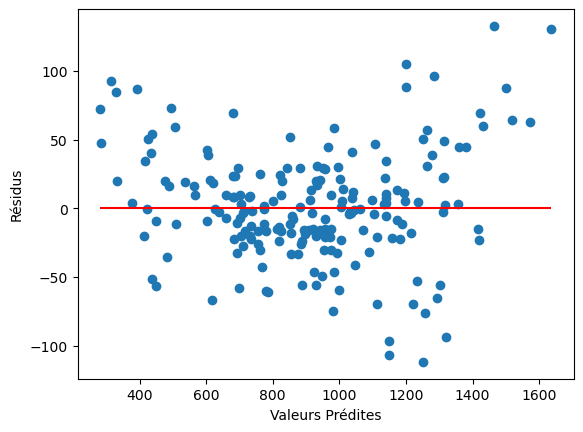

In [16]:
plt.plot(reglinpred,Y_test-reglinpred,"o")
plt.xlabel(u"Valeurs Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(reglinpred),max(reglinpred),"r")
plt.show()

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #e74c3c; background-color: #fcebea; padding: 10px; margin: 15px 0;">
    <strong>Note: </strong>L'hypothèse d'homoscédasticité ne semble pas tout à fait respectée : les écarts semblent plus larges pour les séances éloignées de la moyenne.
</p>

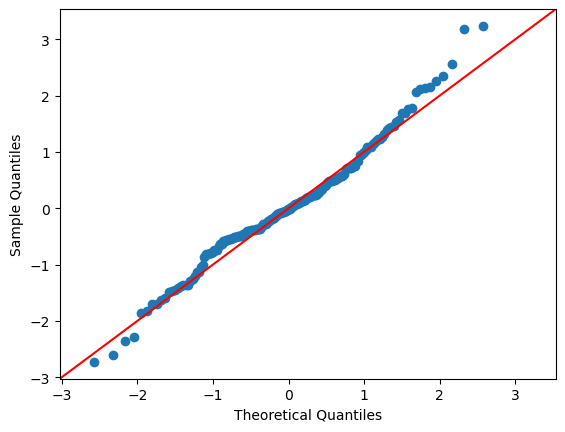

In [17]:
import statsmodels.api as sm
import pylab

residuals = Y_test - reglinpred
residuals = residuals / residuals.std()
sm.qqplot(residuals, line='45')
pylab.show()

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
L'hypothèse de normalité des résidus semble à peu près respectée, il n'y a pas de tendance majeure observée.
</p>

<div id="rlfs"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.2 Régression linéaire avec forward selection
</h3>

In [18]:
def compute_aic(n, mse, k):
    return n * math.log(mse) + 2 * k

sfs_lin = SequentialFeatureSelector(LinearRegression(), direction="forward", cv=5)
sfs_lin.fit(X_train, Y_train)
X_forward_train=sfs_lin.transform(X_train)
X_forward_test=sfs_lin.transform(X_test)
selected_features = X.columns[sfs_lin.get_support()]
print("Variables sélectionnées :", selected_features)
t1 = time()
reglin_forward=LinearRegression().fit(X_forward_train,Y_train)
t2 = time()
R_D_RLfs = t2 - t1
reglin_forward_pred=reglin_forward.predict(X_forward_test)

Variables sélectionnées : Index(['Gender_Female', 'Gender_Male', 'Workout_Type_Cardio', 'Age', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
       'Water_Intake (liters)', 'LWeight'],
      dtype='object')


In [19]:
reglin_forward_coeff = pd.DataFrame(columns=selected_features)
reglin_forward_coeff.loc[1]=reglin_forward.coef_
reglin_forward_coeff

,Gender_Female,Gender_Male,Workout_Type_Cardio,Age,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),LWeight
1,-42.628963,42.628963,5.268184,-3.292313,6.149504,0.61687,714.138747,-0.604819,-3.326052,8.140487


In [20]:
MSE_RLfs = mean_squared_error(reglin_forward_pred,Y_test)
R2_RLfs = r2_score(Y_test, reglin_forward_pred,)
PrevError_RLfs = 1 - reglin_forward.score(X_forward_train, Y_train)
print("MSE=",MSE_RLfs)
print("R2=", R2_RLfs)
print("Erreur sur l'échantillon d'apprentissage =",PrevError_RLfs)

MSE= 1637.514186473931
R2= 0.9803714272319186
Erreur sur l'échantillon d'apprentissage = 0.021325920448082902


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On a ici utilisé un algorithme de forward selection pour choisir les variables explicatives. On remarque qu'on a supprimé quelques variables par rapport au modèle linéaire total (on n'en retient que 10 parmi toutes celles présentes initialement). Les résultats sont satisfaisants et dans le même ordre de grandeur que le modèle précédent. Les résultats sont légèrement meilleurs ici en terme de MSE. Ceci est potentiellement dû à de l'overfitting car l'on retenait toutes les variables.
</p>

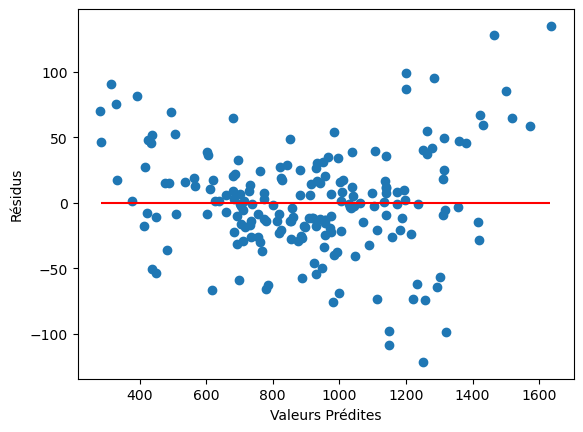

In [21]:
plt.plot(reglinpred,Y_test-reglin_forward_pred,"o")
plt.xlabel(u"Valeurs Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(reglin_forward_pred),max(reglin_forward_pred),"r")
plt.show()

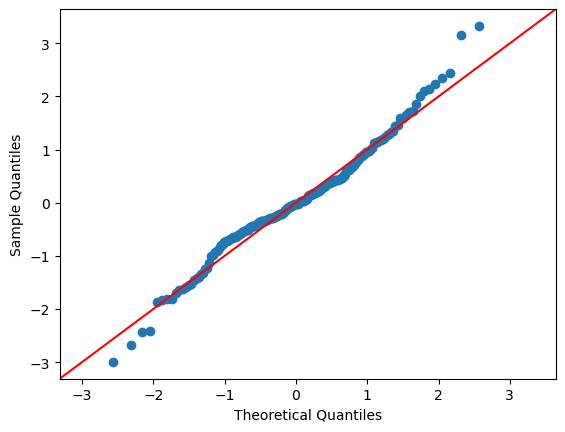

In [22]:
residuals = Y_test - reglin_forward_pred
residuals = residuals / residuals.std()
sm.qqplot(residuals, line='45')
pylab.show()

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On retrouve le même problème d'hétéroscédasticité que pour le modèle complet d'auparavant. La normalité des résidus ne semble pas non plus tout à fait respectée, les queues du QQplot sont en effet un peu plus lourdes que ce que l'on devrait avoir.
</p>

<div id="rlasso"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.3 Régression Lasso
</h3>

In [23]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model=Lasso()
"""
param=[{"alpha":[0.05]+[0.01*i for i in range(1,90)]+[1,2]}]
regLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))
"""

'\nparam=[{"alpha":[0.05]+[0.01*i for i in range(1,90)]+[1,2]}]\nregLasso = GridSearchCV(Lasso(), param,cv=5,n_jobs=-1)\nregLassOpt=regLasso.fit(X_train, Y_train)\nregLassOpt.best_params_["alpha"]\nprint("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))\n'

In [24]:
t1 = time()
regLasso = Lasso(alpha=0.33)
regLassOpt = regLasso.fit(X_train, Y_train)
t2 = time()
R_D_RLasso = t2 - t1

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On détermine la valeur optimale du paramètre de pénalisation L1 par validation croisée 5-fold, en utilisant le R2 sur l'échantillon d'apprentissage comme indicateur de qualité. On obtient ici <em>alpha = 0.33</em>.
</p>

In [25]:
prev=regLassOpt.predict(X_test)
MSE_RLasso = mean_squared_error(prev,Y_test)
R2_RLasso = r2_score(Y_test,prev)
PrevError_RLasso = 1 - regLassOpt.score(X_train, Y_train)
print("MSE=",MSE_RLasso)
print("R2=",R2_RLasso)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_RLasso}")

MSE= 1652.6197253821874
R2= 0.9801903599946934
Erreur sur l'échantillon d'apprentissage : 0.02130382038806966


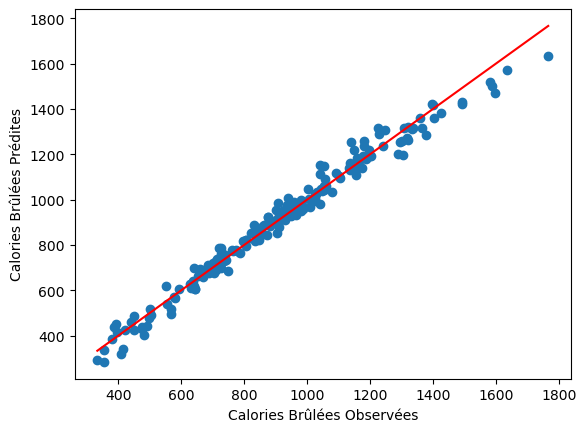

In [26]:
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_test,prev,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel(u"Calories Brûlées Prédites")
plt.show()

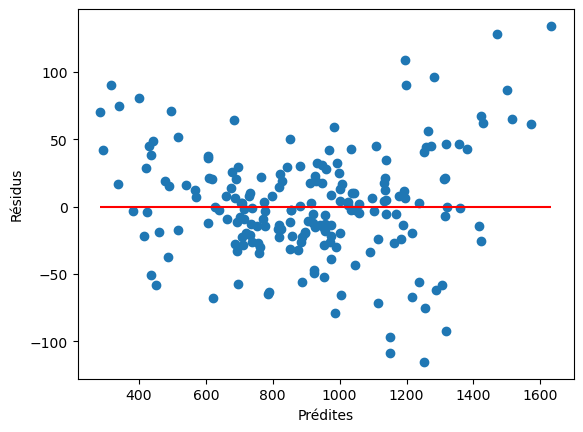

In [27]:
plt.plot(prev,Y_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(prev),max(prev),"r")
plt.show()

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On a utilisé ici la pénalisation Lasso pour faire la sélection de variables. On conserve avec ce modèle un peu plus de variables explicatives qu'avec la forward-selection sans pénalisation mais on obtient des résultats de performance très similaires.
    </p>

<div id="knn"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.4 KNN
</h3>

In [28]:
from sklearn.neighbors import KNeighborsRegressor
"""
# Optimisation de k
# grille de valeurs
param = [{"n_neighbors":list(range(1,20))}]
knn=GridSearchCV(KNeighborsRegressor(),param,cv=5,n_jobs=-1)
knnOpt=knn.fit(Xr_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))
"""

'\n# Optimisation de k\n# grille de valeurs\nparam = [{"n_neighbors":list(range(1,20))}]\nknn=GridSearchCV(KNeighborsRegressor(),param,cv=5,n_jobs=-1)\nknnOpt=knn.fit(Xr_train, Y_train)  # GridSearchCV est lui même un estimateur\n# paramètre optimal\nknnOpt.best_params_["n_neighbors"]\nprint("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))\n'

In [29]:
t1 = time()
knn = KNeighborsRegressor(n_neighbors=10)
knnOpt = knn.fit(X_train, Y_train)
t2 = time()
R_D_KNN = t2 - t1

In [30]:
pred_KNN = knnOpt.predict(X_test)
MSE_KNN = mean_squared_error(pred_KNN,Y_test)
R2_KNN = r2_score(Y_test,pred_KNN)
PrevError_KNN = 1 - knnOpt.score(Xr_train, Y_train)
print("MSE=",MSE_KNN)
print("R2=",R2_KNN)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_KNN}")

MSE= 47564.428358974365
R2= 0.42985419550672854
Erreur sur l'échantillon d'apprentissage : 1.1890393124434682


/home/slisse/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


<div id="svr"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.5 SVR
</h3>

In [31]:
from sklearn.svm import SVR
"""
param={"gamma":['scale','auto'],"C":np.arange(1,500,2), "epsilon":np.arange(0.01,0.5,0.05)}
svr = GridSearchCV(SVR(kernel = 'linear'),param,cv=5,n_jobs=-1)
svrOpt=svr.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svrOpt.best_score_,svrOpt.best_params_))
print(svrOpt.best_params_)
"""

'\nparam={"gamma":[\'scale\',\'auto\'],"C":np.arange(1,500,2), "epsilon":np.arange(0.01,0.5,0.05)}\nsvr = GridSearchCV(SVR(kernel = \'linear\'),param,cv=5,n_jobs=-1)\nsvrOpt=svr.fit(Xr_train, Y_train)\n# paramètre optimal\nprint("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svrOpt.best_score_,svrOpt.best_params_))\nprint(svrOpt.best_params_)\n'

In [32]:
t1 = time()
svr = SVR(kernel='linear', C=285, epsilon=0.41, gamma='scale')
svrOpt = svr.fit(Xr_train, Y_train)
t2 = time()
R_D_SVR = t2 - t1

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On choisit un noyau linéaire car les régressions linéaires donnaient des résultats satisfaisants en terme de prédiction, ce qui suggère une relation de type linéaire entre les données et la variable à prédire (nombre de calories brûlées).
    </p>

In [33]:
# erreur de prévision sur le test
pred_SVR = svrOpt.predict(Xr_test)
MSE_SVR = mean_squared_error(pred_SVR,Y_test)
R2_SVR = r2_score(Y_test,pred_SVR)
PrevError_SVR = 1 - svrOpt.score(Xr_train, Y_train)
print("MSE=",MSE_SVR)
print("R2=",R2_SVR)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_SVR}")

MSE= 1735.601839269586
R2= 0.9791956690940941
Erreur sur l'échantillon d'apprentissage : 0.021548142625012146


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    La régression à vecteurs support donne des résultats similaires aux régressions de type linéaires vues précédemment, pour une complexité augmentée. Il faut en effet optimiser deux hyperparamètres. Les résultats de l'optimisation pour C indique un coefficient de pénalisation assez élevé, on pourrait donc d'avoir de l'overfitting avec SVR. En revanche l'erreur sur l'échantillon d'apprentissage n'est pas infime, ce qui est plutôt rassurant vis-à-vis de l'overfitting.
    </p>

<div id="tree"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.6 Arbres
</h3>

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On recherche l'arbre optimal, pour cela on choisit d'optimiser sa profondeur, le nombre minimal d'échantillons pour diviser un noeud et le nombre minimal d'échantillons par feuille.
    </p>

In [29]:
"""
# Optimisation d'hyperparamètres
param=[{"max_depth":list(range(2,12)),"min_samples_split":list(range(2,10)),"min_samples_leaf":list(range(2,10))}]

tree= GridSearchCV(DecisionTreeRegressor(),param,cv=5,n_jobs=-1)
treeOpt=tree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))
"""

Meilleur score = 0.064673, Meilleur paramètre = {'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 8}


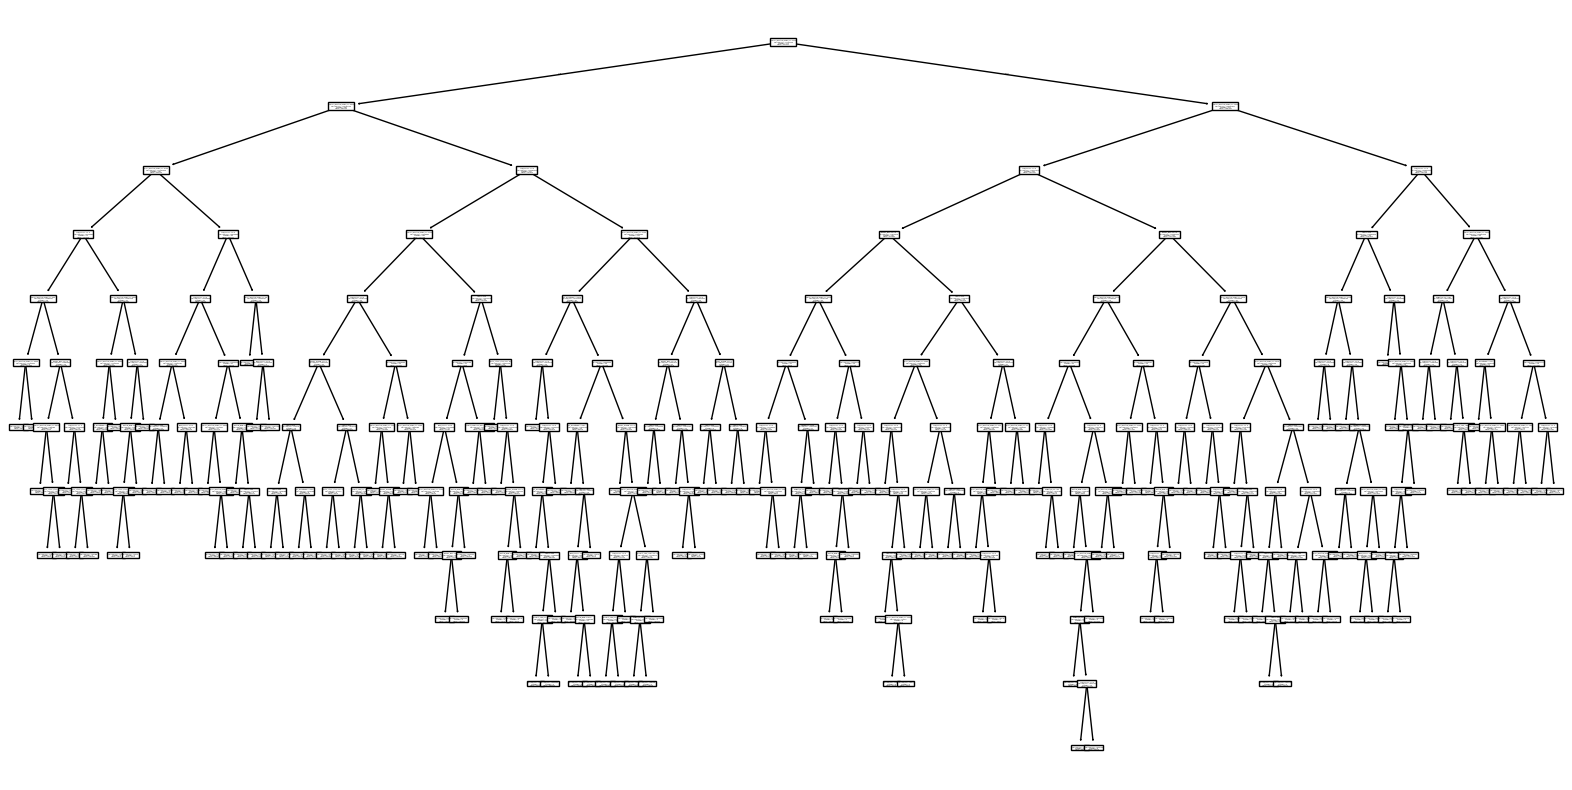

In [35]:
# prévision de l'échantillon test avec l'arbre optimal
t1 = time()
tree = DecisionTreeRegressor(max_depth=11, min_samples_leaf=3, min_samples_split=8)
treeOpt=tree.fit(X_train, Y_train)
t2 = time()
R_D_TREE = t2 - t1

Y_hat = treeOpt.predict(X_test)
plt.figure(figsize=(20,10))
plot_tree(treeOpt,feature_names= X.columns.tolist());
plt.show()

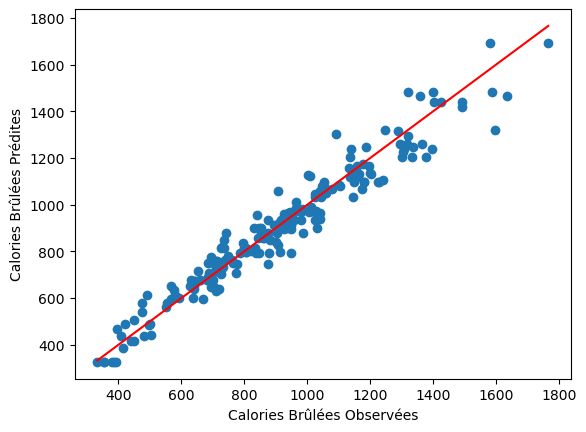

In [36]:
#visualisation des predictions

p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_test,Y_hat,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel(u"Calories Brûlées Prédites")
plt.show()

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
Plus le nombre de calories brûlées observées est élevé, plus les points ont tendance à s'éloigner de la droite y=x. On constate donc qu'avec un arbre on a plus de mal à obtenir une prédiction précise lorsque le nombre de calories brûlées est élevé.
    

In [37]:
# Estimation des erreurs
MSE_TREE = mean_squared_error(Y_hat,Y_test)
R2_TREE = r2_score(Y_test,Y_hat)
PrevError_TREE = 1-treeOpt.score(X_train,Y_train)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_TREE}")
print("MSE=",MSE_TREE)
print("R2=",R2_TREE)

Erreur sur l'échantillon d'apprentissage : 0.010010960361072518
MSE= 4711.310184080469
R2= 0.9435264161098009


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #e74c3c; background-color: #fcebea; padding: 10px; margin: 15px 0;">
    <strong>Note: </strong>L'erreur sur l'échantillon d'apprentissage est très faible comparée à celle sur l'échantillon de test, on fait de l'overfitting ici.
    </p>

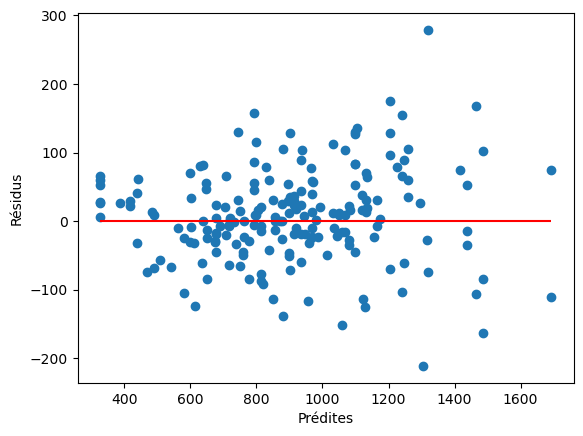

In [38]:
plt.plot(Y_hat,Y_test-Y_hat,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.hlines(0,min(Y_hat),max(Y_hat),"r")
plt.show()

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
Comme évoqué précédement, on constate également avec le graphe des résidus que le modèle a plus de difficultés à donner une prédiction précise lorsque le nombre de calories brûlées est élevé. Les résidus sont centrés autour de 0, il n'y a donc pas de sur ou sous-estimation systématique des calories.
    <br/><br/>
On constate que pour la prédiction de l'échantillon de test, la régression par arbre donne des résultats moins bons que les méthodes précédentes pour une complexité plus élevée. Intuitivement, ce n'est peut-être pas la méthode la plus adaptée à notre objectif de régression puisque le nombre de valeurs prédites possibles est fini, alors que le nombre de calories brûlées est plus ou moins unique à la personne. On aura donc nécessairement des écarts récurrents entre les valeurs prédites et les valeurs réelles.
</p>

<div id="rtree"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.7 Forêts Aléatoires
</h3>

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:

#Recherche des hyperparamètres optimaux (attention, prend du temps à run)

param=[{"max_features":list(range(1,15,1))+["sqrt"]+["log2"],"max_depth":list(range(5,13,1)),"min_samples_split":list(range(2,7,1)),"min_samples_leaf":list(range(2,7,1))}]
rf= GridSearchCV(RandomForestRegressor(n_estimators=100,bootstrap=True, oob_score=True),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    Remarque : il s'agit d'une méthode aléatoire donc les hyperparamètres optimaux ne seront peut-être pas exactement les mêmes à chaque exécution du bloc précédent. On part du principe que les résultats donnés seront quand même similaires.
    </p>

In [41]:
# définition des paramètres (on reprend les paramètres optimaux trouvés, si la cellule précédente met trop de temps à tourner vous pouvez la sauter)
t1 = time()
forest = RandomForestRegressor(n_estimators=500, 
   max_depth=12,
   min_samples_split=4, min_samples_leaf=2, 
   max_features=14, max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
t2 = time()
R_D_RTREE = t2 - t1
# apprentissage
rfFit = forest.fit(X_train,Y_train)
print(f"Erreur Out-of-Bag: {1-rfFit.oob_score_}")

Erreur Out-of-Bag: 0.02679005177124516


In [42]:
# erreur de prévision sur le test

Y_hat = forest.predict(X_test)
MSE_RTREE = mean_squared_error(Y_hat,Y_test)
R2_RTREE = r2_score(Y_test,Y_hat)
PrevError_RTREE = 1-rfFit.score(X_train,Y_train)
print(f"Erreur sur l'échantillon d'apprentissage: {PrevError_RTREE}")
print("MSE=",MSE_RTREE)
print("R2=",R2_RTREE)

Erreur sur l'échantillon d'apprentissage: 0.005329488849833308
MSE= 2406.8886890178014
R2= 0.97114908062031


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    On constate que la forêt aléatoire donne de meilleurs résultats que l'arbre aléatoire précédent, ce qui est rassurant. En revanche, la prédiction sur l'échantillon de test n'est pas meilleure que la régression ou la SVR, pour un temps d'optimisation des hyperparamètres beaucoup plus long. L'erreur sur l'échantillon d'apprentissage indique aussi qu'on fait de l'overfitting.
    </p>

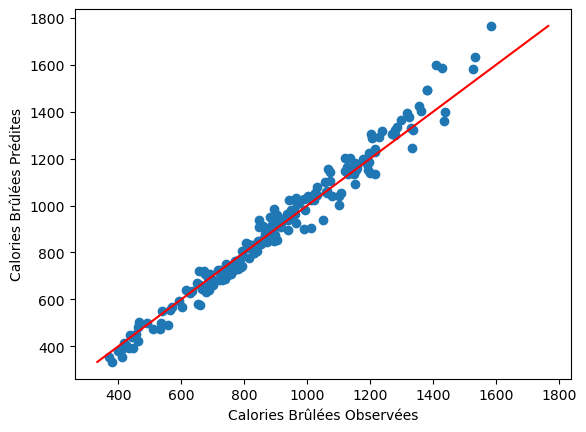

In [43]:
#visualisation des predictions en fonction des observations
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_hat,Y_test,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel("Calories Brûlées Prédites")
plt.show()

Session_Duration (hours) 0.6606248372198107
Avg_BPM 0.09831663076083248
Experience_Level_3 0.09106017567528632
Fat_Percentage 0.07285378777772539
Age 0.01947894658695335
Experience_Level_2 0.010064979257479382
Experience_Level_1 0.008556962234806648
Gender_Male 0.005810323540522013
LWeight 0.005617521159375124
Gender_Female 0.00546686505133027
Height (m) 0.0051844939479530954
Water_Intake (liters) 0.003959156847607673
LBMI 0.003647275479556951
Resting_BPM 0.0034510345837635162
Max_BPM 0.0026247962900326606
Workout_Frequency (days/week) 0.001384656508597494
Workout_Type_Strength 0.0006248538967313425
Workout_Type_Cardio 0.0005156416477937327
Workout_Type_Yoga 0.0004104306074674061
Workout_Type_HIIT 0.0003466309263744675


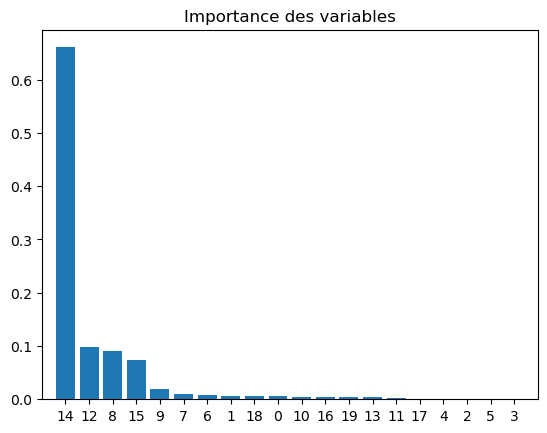

In [44]:
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(X.columns[indices[f]], importances[indices[f]])

plt.figure()
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices]);
plt.xticks(range(X_train.shape[1]), indices);
plt.xlim([-1, X_train.shape[1]]);
plt.show()

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
La variable la plus importante est de loin la durée de la séance, ce qui reste cohérent avec l'analyse exploratoire qui nous montrait que les calories brûlées et la durée de la séance sont deux variables très corrélées.
    </p>

<div id="gbr"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.8 Gradient Boosting
</h3>

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
"""
# Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
param = {
    'n_estimators': [1000,1500,2000,3000],
    'learning_rate': [0.02, 0.05, 0.1],
    'max_depth': [1, 2, 3, 4],
    'subsample': [0.8, 0.5, 0.3],
}

# Grid Search with 5-fold cross-validation
grid = GridSearchCV(model, param, cv=5, n_jobs=-1)
GBRopt = grid.fit(X_train, Y_train)
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - GBRopt.best_score_,GBRopt.best_params_))
"""

Meilleur score = 0.002354, Meilleurs paramètres = {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 3000, 'subsample': 0.5}


In [47]:
t1 = time()
gbr = GradientBoostingRegressor(
    n_estimators=3000,    # number of boosting stages
    learning_rate=0.02,   # shrinkage step size
    max_depth=2,         # depth of individual trees
    subsample = 0.5,
    random_state=42
)
GBRopt = gbr.fit(X_train, Y_train)
t2 = time()
R_D_GBR = t2 - t1


# Predictions
Y_hat = GBRopt.predict(X_test)
MSE_GBR = mean_squared_error(Y_hat,Y_test)
R2_GBR = r2_score(Y_test,Y_hat)
PrevError_GBR = 1-rfFit.score(X_train,Y_train)
print(f"Erreur sur l'échantillon d'apprentissage : {PrevError_GBR}")
print("MSE=",MSE_GBR)
print("R2=",R2_GBR)

Erreur sur l'échantillon d'apprentissage : 0.005329488849833308
MSE= 169.1017939614675
R2= 0.9979730087864869


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
Les résultats proposés par le Gradient Boosting sont très bons, c'est une méthode bien plus complexe mais donne des résultats significativement meilleurs en termes de MSE ou R2. On a pas vraiment d'overfitting, l'erreur sur le jeu d'entraînement et d'apprentissage n'étant pas très éloigné.
Néanmoins, il est à nuancer que ce modèle est extrêmement complexe avec 3000 arbres, le gain n'est peut être pas réélement significatif par rapport à d'autres modèles qui ont beaucoup moins de paramètres.
    </p>

<div id="nnet"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.9 Réseaux de Neurones
</h3>

In [48]:
from sklearn.neural_network import MLPRegressor

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On garde la couche d'activation par défaut (ReLU) car c'est la plus adaptée pour notre étude, le nombre de calories brulées prédites doit en effet être positif et cette fonction est à valeur dans R+. On augmente le nombre maximal d'itérations car on veut que l'algorithme converge. On veut trouver le nombre de couches cachées optimal.
    </p>

In [10]:
setseed(483)
param =[{"hidden_layer_sizes":list([(8,),(9,),(10,),(11,),(12,),(9,8),(10,9),(11,10),(12,11),(12,10)])}]
nnet= GridSearchCV(MLPRegressor(max_iter=20000),param,cv=5,n_jobs=-1) 
# entrainement
nnetOpt=nnet.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.017289, Meilleur paramètre = {'hidden_layer_sizes': (9,)}


In [14]:
print(nnetOpt.best_params_['hidden_layer_sizes'])

(9,)


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    Maintenant que nous avons calculé la taille de notre réseau, nous allons ajuster la taille du <em>batch</em> et du <em>learning rate</em>.
    </p>

In [ ]:
"""
param=[{"batch_size":list([100,150,200,250]),"learning_rate_init":list([0.0005,0.0008,0.001,0.003]),'solver':list(['sgd','adam'])}]
nnet2= GridSearchCV(MLPRegressor(max_iter=20000,hidden_layer_sizes=nnetOpt.best_params_['hidden_layer_sizes']),param,cv=5,n_jobs=-1) 
# entrainement
nnetOpt2=nnet.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))
"""

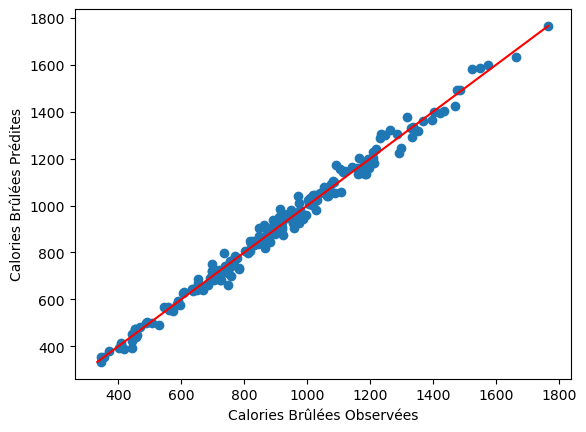

In [50]:
# prévision de l'échantillon test
t1 = time()
nnet = MLPRegressor(hidden_layer_sizes=(10,),max_iter=20000)
nnetOpt=nnet.fit(Xr_train, Y_train)
t2 = time()
R_D_NN = t2 - t1
Y_hat = nnetOpt.predict(Xr_test)

#visualisation des predictions en fonction des observations
p=np.min(Y_test),np.max(Y_test)
plt.plot(Y_hat,Y_test,"o")
plt.plot(p,p,"r-")
plt.xlabel("Calories Brûlées Observées")
plt.ylabel("Calories Brûlées Prédites")
plt.show()

In [51]:
# Estimation de l'erreur de prévision sur le test
MSE_NN = mean_squared_error(Y_hat,Y_test)
R2_NN = r2_score(Y_test,Y_hat)
PrevError_NN = 1-nnetOpt.score(Xr_train,Y_train)
print("Erreur de prévision = %f" % (PrevError_NN))
print("MSE=",MSE_NN)
print("R2=",R2_NN)

Erreur de prévision = 0.009935
MSE= 872.4514686373451
R2= 0.989542089295945


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
Les prédictions du réseau de neurones sont extrêmement proches de la réalité, pour un temps d'optimisation des hyperparamètres et de calcul assez limité.
    </p>

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #00ffff; padding: 10px; margin: 15px 0;">
    Suggestions pour la suite : faire un tableau récapitulatif avec toutes les erreurs (et eventuellement les temps de calculs ?) pour chacunes des méthodes pour les comparer.
Faire un mosaic plot pour mettre par exemple tous les graphes de résidus à coté
    </p>

<div id="recap"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
2.10 Tableau récapitulatif
</h3>

In [53]:
recap = pd.DataFrame({"Erreur sur l'échantillon d'apprentissage": [PrevError_RLt, PrevError_RLfs, PrevError_RLasso, PrevError_SVR, PrevError_TREE, PrevError_RTREE,PrevError_GBR, PrevError_NN], 
                      "Durée d'entraînement": [R_D_RLt, R_D_RLfs, R_D_RLasso, R_D_SVR, R_D_TREE, R_D_RTREE,R_D_GBR, R_D_NN],
                      'RMSE': np.sqrt([MSE_RLt, MSE_RLfs, MSE_RLasso, MSE_SVR, MSE_TREE, MSE_RTREE, MSE_GBR, MSE_NN]), 
                      'R2': [R2_RLt, R2_RLfs, R2_RLasso, R2_SVR, R2_TREE, R2_RTREE, R2_GBR, R2_NN]}, index=['RegLinTot','RegLinFSelec', 'RegLasso', 'SVR','Tree','RandomTree', 'GradientBoosting','NeuralNetwork'])

In [55]:
recap

,Erreur sur l'échantillon d'apprentissage,Durée d'entraînement,MSE,R2
RegLinTot,0.021146,0.214780,40.919680,0.979929
RegLinFSelec,0.021326,0.000876,40.466210,0.980371
RegLasso,0.021304,0.005794,40.652426,0.980190
SVR,0.021548,0.496946,41.660555,0.979196
Tree,0.010011,0.011439,68.638984,0.943526
RandomTree,0.005329,0.000083,49.060052,0.971149
GradientBoosting,0.005329,2.719676,13.003915,0.997973
NeuralNetwork,0.009935,8.189356,29.537289,0.989542


<div style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    <p style="font-size:22px"><strong>En comparant les résultats sur l'échantillon de test :</strong></p>
    <ul>
    <li style="margin-top: 15px"><strong>La prédiction par gradient boosting est de loin la plus précise:</strong> on parvient à prédire le nombre de calories brûlées à environ 13 kcalories près en moyenne (soit l'équivalent d'un huitième de banane)!</li>
    <li style="margin-top: 15px"><strong>Les régressions linéaires offrent des résultats très satisfaisants:</strong> on parvient à prédire le nombre de calories brûlées à une quarantaine de kcalories près, pour un temps de calcul et d'optimisation des paramètres minimes.
    <li style="margin-top: 15px"><strong>A l'inverse, les modèles non linéaires de type arbre aléatoire et régression à vecteurs supports, sont ici inutilement complexes pour notre jeu de données. Ils nécessitent un temps considérable pour optimiser les hyperparamètres et fournissent des prédictions moins bonnes que les régressions linéaires.</strong> Pourquoi cela? En fait, notre jeu de données n'est pas suffisamment complexe pour que de telles méthodes soient intéressantes, et on se retrouve ainsi à faire de l'overfitting sur des données d'entraînement qui sont en nombre limité. On peut voir sur les résultats de l'ACP (voir notebook R) que les calories brûlées sont intrésequement présente dans notre jeu de données étant donné les fortes corrélations avec la durée de la session et le pourcentage de masse graisseuse. Ainsi, même les méthodes les plus simples arrivent à exploiter ces relations pour obtenir de très bonnes prédictions du nombre de calories brûlées.
    </ul>
    <p style="font-size:22px; margin-top:40px"><strong>Et si l'on veut interpréter?</strong></p>
    Si l'on veut, au-delà de la pure prédiction, déterminer le rôle de chaque variable dans le calcul du nombre de calories brûlées, il est difficile d'étudier le réseau de neurones qui est pourtant le plus précis en prédiction. En revanche, les régressions linéaires, et en particulier la régression LASSO, offrent une interprétation beaucoup plus simple, tout en garantissant une précision de prédiction satisfaisante. En effet, LASSO a déjà supprimé plusieurs variables qui n'étaient apparemment pas utiles au calcul.
</div>

Lasso conserve 12 variables et en supprime 8


Text(0.5, 1.0, 'Coefficients du modèle LASSO')

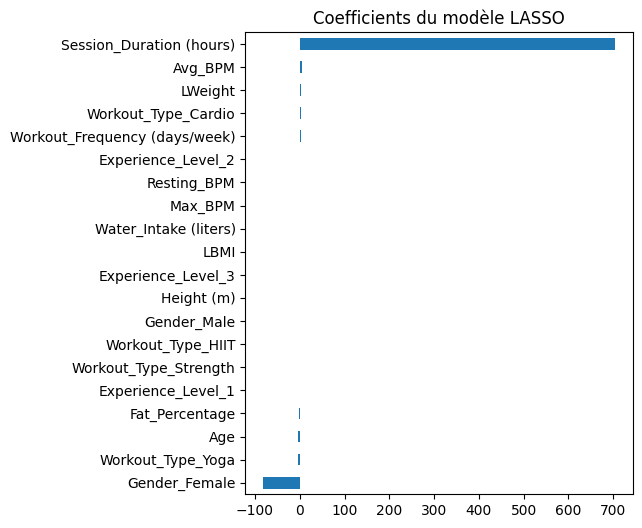

In [65]:
regLasso=Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(X_train,Y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + " variables et en supprime " +  str(sum(coef == 0)))
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (5.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle LASSO")

<div style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
<p>On constate que deux variables semblent "sortir du lot" en terme d'impact sur le nombre de calories brûlées :</p>
<ul>
    <li style="margin-top: 15px"><strong>La durée de la session est la variable prioritaire.</strong> Ainsi, une heure de session en plus aboutit à environ 700 kcal brûlées en plus! C'est cohérent avec ce que l'on peut observer sur le graphe de corrélations des variables (voir notebook R), on avait en effet observé une très forte corrélation positive entre la durée de la session et le nombre de calories brûlées.</li>
    <li style="margin-top: 15px"><strong>De façon surprenante, le genre intervient aussi fortement.</strong> Une femme brûlera environ 90kcal de moins par séance.
    </ul>

<p>Toutes les autres variables semblent avoir des rôles assez mineurs. Même si le pourcentage de masse graisseuse et la fréquence d'entraînement étaient fortement corrélés avec le nombre de calories brûlées, c'est bel et bien la durée de la session qui est quasiment la seule à prendre en compte dans le calcul.</p>
    
</div>

<div id="class"></div>
<h2 style="color:#2980b9; font-size:32px; font-family:'Trebuchet MS', sans-serif; margin-top:30px;">
    3. Prédiction du niveau d'expérience - Classification
</h2>

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6;">
    On cherche enfin à prédire le niveau d'expérience.lors d'une séance. Pour ce faire, nous comparons donc différentes méthodes de classification afin de s'assurer une prédiction fiable.
</p>

In [62]:
gym_dummies=pd.get_dummies(gym[["Gender","Workout_Type"]])
gym_quant=gym[["Age","Height (m)","Max_BPM","Avg_BPM","Resting_BPM","Session_Duration (hours)","Fat_Percentage","Water_Intake (liters)","Workout_Frequency (days/week)","LWeight","LBMI", "Calories_Burned"]]
X=pd.concat([gym_dummies,gym_quant],axis=1)
Y=gym["Experience_Level"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Taille de l'échantillon test : 20%


# L'algorithme des réseaux de neurones ainsi que SVR nécessitent éventuellement une standardisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

<div id="rlsp"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.1 Régression multinomiale sans pénalisation
</h3>

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
t1 = time()
logit = LogisticRegression(penalty="l1",solver="liblinear")
logitOpt=logit.fit(X_train, Y_train)
t2 = time()
C_D_RLSP = t2 - t1  # GridSearchCV est lui-même un estimateur
Y_hat = logitOpt.predict(X_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
print(accuracy_score(Y_test, Y_hat))
C_AS_RLSP = accuracy_score(Y_test, Y_hat)

Experience_Level   1   2   3
row_0                       
1                 68  15   0
2                 10  60   0
3                  0   0  42
0.8717948717948718


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    On constate que la régression logistique a du mal à différencier niveaux d'expérience 1 et 2. C'est cohérent avec ce qu'on avait observé lors de la représentation des niveaux d'expérience dans le premier plan factoriel d'ACP : les clusters correspondant aux deux premiers niveaux d'expérience étaient indissociés, tandis que le troisième niveau d'expérience était clairement à part. Tout de même, la régression logistique parvient à prédire le niveau d'expérience approprié dans 87% des cas.
    </p>

In [67]:
# Récupération des coefficients
coeffs = pd.DataFrame(logitOpt.coef_, 
                      columns=X_train.columns, 
                      index=logitOpt.classes_)
)
# Récupération des intercepts
intercepts = pd.Series(logitOpt.intercept_, index=logitOpt.classes_, name='intercept')

# Affichage propre
print("Coefficients :")
print(coeffs)

print("\nIntercepts :")
print(intercepts)

Coefficients :
   Gender_Female  Gender_Male  Workout_Type_Cardio  Workout_Type_HIIT  \
1       0.422514          0.0              0.00000           0.054103   
2      -3.506554          0.0             -0.07078           0.000000   
3       1.368177          0.0              0.00000           0.000000   

   Workout_Type_Strength  Workout_Type_Yoga       Age  Height (m)   Max_BPM  \
1               0.043695          -0.205743 -0.008587    1.738689  0.021293   
2              -0.222673           0.106363  0.006798   -1.878874 -0.026300   
3               0.000000           0.000000  0.040122    0.000000  0.081963   

    Avg_BPM  Resting_BPM  Session_Duration (hours)  Fat_Percentage  \
1  0.049835     0.006749                       0.0        0.021491   
2 -0.016248    -0.012359                       0.0        0.373556   
3 -0.128203     0.016942                       0.0       -1.384371   

   Water_Intake (liters)  Workout_Frequency (days/week)   LWeight      LBMI  \
1              

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    Quand on regarde les valeurs des coefficients,on voit que les gens de la classe 1 sont ceux qui sont plus grand, qui boivent plus d'eau qui vont moins à la salle de sport et sont plus lourd. Pour la classe 2, ce sont plus des hommes, ceux qui font du font du yoga, petits, plus gras, boivent moins d'eau. La classe numéro 3 sont plus des femmes, plus agés, un BPM moyen plus faible, plus secs (moins gras), vont plus souvent à la salle et brûlent plus de calories.
Ces interprétations sont à nuancés car on a sélectionné toutes les variables dont certaines qui ne sont pas vraiment significatives, les méthodes par sélection AIC ou Lasso permettront de mieux cerner les variables importantes.
    </p>

<div id="rlp"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.2 Régression multinomiale avec pénalisation L1
</h3>

In [69]:
"""
# Optimisation du paramètre de pénalisation
# grille de valeurs
param=[{"C":[1,2,3,4,5]}]
logitP = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOptP=logitP.fit(X_train, Y_train)  # GridSearchCV est lui-même un estimateur
# paramètre optimal
logitOptP.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (logitOptP.best_score_,logitOptP.best_params_))
"""

/home/slisse/.local/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Meilleur score = 0.867634, Meilleur paramètre = {'C': 4}


In [72]:
t1 = time()
logitP = LogisticRegression(penalty="l1",solver="liblinear", C=4)
logitOptP=logitP.fit(X_train, Y_train)
t2 = time()
C_D_RLP = t2 - t1

In [73]:
Y_hat = logitOptP.predict(X_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
C_AS_RLP = accuracy_score(Y_test, Y_hat)
print(C_AS_RLP)

Experience_Level   1   2   3
row_0                       
1                 67  14   0
2                 11  61   0
3                  0   0  42
0.8717948717948718


In [74]:
coeffs = pd.DataFrame(logitOptP.coef_, 
                      columns=X_train.columns, 
                      index=logitOptP.classes_)

# Récupération des intercepts
intercepts = pd.Series(logitOptP.intercept_, index=logitOptP.classes_, name='intercept')

# Affichage propre
print("Coefficients :")
print(coeffs)

print("\nIntercepts :")
print(intercepts)

Coefficients :
   Gender_Female  Gender_Male  Workout_Type_Cardio  Workout_Type_HIIT  \
1       0.458768          0.0             0.000000           0.080417   
2      -3.530783          0.0            -0.120555           0.000000   
3       4.692417          0.0             0.000000           0.000000   

   Workout_Type_Strength  Workout_Type_Yoga       Age  Height (m)   Max_BPM  \
1               0.090727          -0.307852 -0.010377    1.543767  0.009762   
2              -0.272656           0.138855  0.008485   -1.578745 -0.018605   
3               0.000000           0.000000  0.028678    0.000000  0.059912   

    Avg_BPM  Resting_BPM  Session_Duration (hours)  Fat_Percentage  \
1  0.041743    -0.006284                 -0.000053       -0.008149   
2 -0.011800    -0.006947                  0.000000        0.400208   
3 -0.081128     0.010628                  0.000000       -1.304456   

   Water_Intake (liters)  Workout_Frequency (days/week)   LWeight      LBMI  \
1              

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    On constate que la régression logistique avec pénalisation a encore du mal à différencier niveaux d'expérience 1 et 2. C'est cohérent avec ce qu'on avait observé lors de la représentation des niveaux d'expérience dans le premier plan factoriel d'ACP : les clusters correspondant aux deux premiers niveaux d'expérience étaient indissociés, tandis que le troisième niveau d'expérience était clairement à part. 

On obtient essentiellement les mêmes interprétations des classes que pour la régression totale.
</p>

<div id="km"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.3 K-Means
</h3>

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    On va utiliser la méthode des Kmeans qui est une méthode non supervisée contrairement à toutes les autres méthodes ici présente. On va l'appliquer sur les données d'ACP car comme on a pu voir sur l'analyse préalable en R, l'ACP semble assez bien discriminer les groupes de niveau.</p>

In [75]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [76]:
pca=PCA(6)
scaler.fit(gym_quant)  
gym_acp = scaler.transform(gym_quant)  
X_acp=pca.fit_transform(gym_acp)

In [77]:
t1 = time()
kmeans=KMeans(n_clusters=3)
k_clusters=kmeans.fit_predict(X_acp)
t2 = time()
C_D_KM = t2 - t1
table = pd.crosstab(k_clusters, gym["Experience_Level"])

In [83]:
#Pour pouvoir associer les clusters de kmeans avec les classes d'expériences
from sklearn.metrics import confusion_matrix
def correspondence_score(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    total = np.sum(cm)
    sum = 0
    for i in range(3):
        max_idx = np.unravel_index(np.argmax(cm), cm.shape)
        sum += cm[max_idx]
        # Remove row
        cm = np.delete(cm, max_idx[0], axis=0)
        # Remove column
        cm = np.delete(cm, max_idx[1], axis=1)
    return sum/total

In [84]:
print(table)
C_AS_KM = correspondence_score(Y_test, k_clusters[)
print(C_AS_KM)

Experience_Level    1    2    3
row_0                          
0                   0   11  191
1                 255  261    0
2                 121  134    0
0.5889003083247688


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    On voit qu'on arrive plutôt bien à récupérer le groupe de niveau expérimenté mais les deux autres groupes sont confondus comme ce qu'on a pu voir sur le graphe d'ACP (voir Notebook R). C'est assez incroyable d'obtenir d'aussi bons résultats pour une méthode non supervisée. Cela s'explique par le fait que le niveau d'expérience est intrinsèquement présent dans les données, comme on a pu le voir, l'ACP arrive à exploiter l'information des données pour faire ressortir les niveaux d'éxpériences</p>

<div id="knnc"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.4 KNN
</h3>

In [85]:
from sklearn.neighbors import KNeighborsClassifier
"""
# Optimisation de k
# grille de valeurs
param=[{"n_neighbors":list(range(1,15)), "leaf_size":np.arange(20,40,1)}]
knn=GridSearchCV(KNeighborsClassifier(),param,cv=5,n_jobs=-1)
knnOpt=knn.fit(Xr_train, Y_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
knnOpt.best_params_["n_neighbors"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))
"""

'\n# Optimisation de k\n# grille de valeurs\nparam=[{"n_neighbors":list(range(1,15)), "leaf_size":np.arange(20,40,1)}]\nknn=GridSearchCV(KNeighborsClassifier(),param,cv=5,n_jobs=-1)\nknnOpt=knn.fit(Xr_train, Y_train)  # GridSearchCV est lui même un estimateur\n# paramètre optimal\nknnOpt.best_params_["n_neighbors"]\nprint("Meilleur score = %f, Meilleur paramètre = %s" % (1.-knnOpt.best_score_,knnOpt.best_params_))\n'

In [86]:
t1 = time()
knn = KNeighborsClassifier(n_neighbors=8)
knnOpt=knn.fit(Xr_train, Y_train)
t2 = time()
C_D_KNN = t2 - t1

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    Remarque : on standardise les données pour utiliser les K plus proches voisins, pour s'assurer que les distances au niveau de chaque dimension (c'est-à-dire par rapport à chaque variable) sont d'un ordre de grandeur similaire.</p>

In [87]:
Y_hat = knnOpt.predict(Xr_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
C_AS_KNN = accuracy_score(Y_test, Y_hat)
print(C_AS_KNN)

Experience_Level   1   2   3
row_0                       
1                 59  16   0
2                 19  59   0
3                  0   0  42
0.8205128205128205


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    On obtient des résultats légèrement moins bons en utilisant la méthode non-paramétrique des K plus proches voisins pour K = 8 (paramètre optimisé par validation croisée). Mais cette méthode est très basique (1 seul paramètre) et exploite bien les liens entres les variables et le niveau d'expérience (comme on a pu le voir grâce aux résultats d'ACP et Kmeans). </p>

<div id="svm"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.5 SVM
</h3>

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #e74c3c; background-color: #fcebea; padding: 10px; margin: 15px 0;">
    <strong>Note: </strong>Puisque nous n'avons pas encore d'idées, à ce stade-là, sur la forme de la fonction qui aux autres variables associe le niveau d'expérience, on choisit le noyau par défaut 'RBF' pour la SVM.
    </p>

In [88]:
from sklearn.svm import SVC
param=[{"C":[0.1, 0.15, 0.2, 0.25, 0.3, 0.5], "gamma" : ['scale', 'auto'],"kernel":['linear','poly','rbf']}]
svc = GridSearchCV(SVC(probability=True),param,cv=5,n_jobs=-1)
svcOpt=svc.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - svcOpt.best_score_,svcOpt.best_params_))

Meilleur score = 0.122167, Meilleur paramètre = {'C': 0.2, 'gamma': 'scale', 'kernel': 'linear'}


In [130]:
t1 = time()
svc = SVC(C=0.2,probability=True,
          gamma='scale',
         kernel='linear')
svcOpt=svc.fit(Xr_train, Y_train)
t2 = time()
C_D_SVC = t2 - t1

In [131]:
Y_hat = svcOpt.predict(Xr_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
C_AS_SVC = accuracy_score(Y_test, Y_hat)
print(C_AS_SVC)

Experience_Level   1   2   3
row_0                       
1                 66   9   0
2                 12  66   0
3                  0   0  42
0.8923076923076924


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    On obtient des résultats légèrements meilleurs en terme de précision que pour les régressions logistiques, si ce n'est que la SVM a davantage tendance à considérer que les débutants sont plus expérimentés qu'ils ne le sont vraiment.</p>

<div id="treec"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.6 Arbres binaires de décision
</h3>

In [92]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10)), "max_features":list(range(5,15,1))+["sqrt"]+["log2"], "min_samples_split":list(range(2,7,1)),"min_samples_leaf":list(range(2,7,1))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=5,n_jobs=-1)
treeOpt=tree.fit(X_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.101588, Meilleur paramètre = {'max_depth': 5, 'max_features': 14, 'min_samples_leaf': 6, 'min_samples_split': 5}


In [93]:
t1 = time()
tree = DecisionTreeClassifier(max_depth=5,max_features=14,min_samples_leaf=6,min_samples_split=5)
treeOpt=tree.fit(X_train, Y_train)
t2 = time()
C_D_TREE = t2 - t1

In [94]:
Y_hat = treeOpt.predict(X_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
C_AS_TREE = accuracy_score(Y_test, Y_hat)
print(C_AS_TREE)

Experience_Level   1   2   3
row_0                       
1                 63   0   0
2                 15  75   0
3                  0   0  42
0.9230769230769231


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    L'arbre binaire de décision donne des résultats d'une meilleure précision que les méthodes vues jusqu'à présent (seulement 8% d'erreur). En particulier, tous les sportifs de niveau intermédiaire et avancé ont une prédiction correcte.</p>

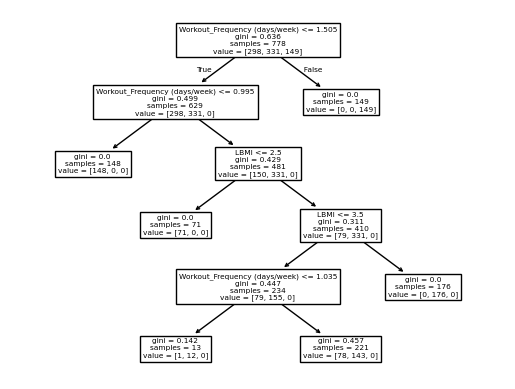

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(tree,feature_names=gym.columns.tolist());
plt.show()

<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
En regardant les règles de séparations de l'arbre, on conclut que les deux variables les plus importantes pour expliquer le niveau d'expérience sont le nombre de fois où une personne va à la salle par semaine ainsi que son IMC.</p>

<div id="rtreec"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.7 Forêts Aléatoires
</h3>

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
param=[{"n_estimators":list(range(100,500,100)),"max_features":list(range(5,15,1))+["sqrt"]+["log2"],"max_depth":list(range(5,10,1)),"min_samples_split":list(range(2,7,1)),"min_samples_leaf":list(range(2,7,1))}]
rf= GridSearchCV(RandomForestClassifier(bootstrap=True, oob_score=True),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))



KeyboardInterrupt



In [103]:
t1 = time()
rf = RandomForestClassifier(n_estimators=100,bootstrap=True, oob_score=True,max_depth=8,max_features=13,min_samples_leaf=2,min_samples_split=6)
rfOpt=rf.fit(Xr_train, Y_train)
t2 = time()
C_D_RTREE = t2 - t1

In [104]:
Y_hat = rfOpt.predict(Xr_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
C_AS_RTREE = accuracy_score(Y_test, Y_hat)
print(C_AS_RTREE)

Experience_Level   1   2   3
row_0                       
1                 63   0   0
2                 15  75   0
3                  0   0  42
0.9230769230769231


In [108]:
importances = rfOpt.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xr_train.shape[1]):
    print(X.columns[indices[f]], importances[indices[f]])

Session_Duration (hours) 0.46616847922461485
Workout_Frequency (days/week) 0.31112518010762
Fat_Percentage 0.12714880861213385
Calories_Burned 0.03895920723321157
Max_BPM 0.01101362876164311
Height (m) 0.008154307198956535
LWeight 0.00731928828847778
LBMI 0.006834904522887806
Age 0.006760989034545119
Avg_BPM 0.005946499737013477
Water_Intake (liters) 0.004562132708417264
Resting_BPM 0.0034447728096784554
Workout_Type_Yoga 0.0005909365039929037
Workout_Type_HIIT 0.0005643338705940766
Gender_Male 0.0005412007740804455
Workout_Type_Strength 0.0003554127780059747
Gender_Female 0.0002948158340833097
Workout_Type_Cardio 0.00021510200004344496


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On obtient une nouvelle fois la même précision, comme si on atteignait un seuil... En regardant l'importance des variables dans la forêt, on trouve que les variables les plus importantes sont comme trouvés pour les régressions la durée de la session, le nombre de session par semaine et le pourcentage de masse graisseuse. Cela diffère de l'arbre unique et on peut donc déduire que l'arbre n'utilise pas forcément les variables les plus utiles.</p>

<div id="gbc"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.8 Gradient Boosting
</h3>

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
# Gradient Boosting Regressor
model = GradientBoostingClassifier(random_state=42)
param = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.25],
    'max_depth': [1, 2, 3, 4, 5],
    'subsample': [1,0.9,0.8, 0.7, 0.5],
}

# Grid Search with 5-fold cross-validation
gbc = GridSearchCV(model, param, cv=5, n_jobs=-1)
GBCOpt = gbc.fit(X_train, Y_train)
print("Meilleur score = %f, Meilleurs paramètres = %s" % (1. - GBCOpt.best_score_,GBCOpt.best_params_))

Meilleur score = 0.102878, Meilleurs paramètres = {'learning_rate': 0.02, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.8}


In [110]:
t1 = time()
gbc =GradientBoostingClassifier(random_state=42,learning_rate=0.02,max_depth=2,n_estimators=300,subsample=0.8)
GBCOpt = gbc.fit(X_train, Y_train)
t2 = time()
C_D_GB = t2 - t1

In [111]:
Y_hat = GBCOpt.predict(X_test)
table = pd.crosstab(Y_hat, Y_test)
print(table)
C_AS_GB = accuracy_score(Y_test, Y_hat)
print(C_AS_GB)

Experience_Level   1   2   3
row_0                       
1                 63   0   0
2                 15  75   0
3                  0   0  42
0.9230769230769231


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On atteint a nouveau la même précision alors que la complexité augmente. On va donc préférer des méthodes plus simples qui donnent les mêmes résultats.</p>

<div id="nnetc"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.9 Réseaux de Neurones
</h3>

In [112]:
from sklearn.neural_network import MLPClassifier

In [134]:
param=[{"hidden_layer_sizes":list([(3,),(4,),(5,),(6,),(7,),(8,),(3,4),(4,5),(3,5),(5,4),(4,4),(5,3)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=20000),param,cv=5,n_jobs=-1) 
# entrainement
nnetOpt=nnet.fit(Xr_train, Y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.133730, Meilleur paramètre = {'hidden_layer_sizes': (3, 4)}


In [135]:
t1 = time()
nnet = MLPClassifier(max_iter=20000,hidden_layer_sizes= (3,4))
nnetOpt=nnet.fit(Xr_train, Y_train)
t2 = time()
C_D_NN = t2 - t1

In [117]:
Y_hat = nnetOpt.predict(Xr_test)
print(pd.crosstab(Y_hat, Y_test))
C_AS_NN = accuracy_score(Y_test, Y_hat)
print(C_AS_NN)

Experience_Level   1   2   3
row_0                       
1                 67  14   0
2                 11  61   0
3                  0   0  42
0.8717948717948718


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On obtient une moins bonnes précisions avec le réseau de neurones, cela doit être dû à un nombre de paramètres quand même assez faible comme on a que deux couches cachées.</p>

<div id="roc"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.10 AUC
</h3>

In [132]:
from sklearn.metrics import roc_auc_score

logreg_prob = logitOpt.predict_proba(X_test)
logreg_pen_prob = logitOptP.predict_proba(X_test)
knn_prob = knnOpt.predict_proba(X_test)
svc_prob = svcOpt.predict_proba(X_test)
tree_prob = treeOpt.predict_proba(X_test)
rfc_prob = rfOpt.predict_proba(X_test)
gbm_prob = GBCOpt.predict_proba(X_test)
nnet_prob = nnetOpt.predict_proba(X_test)

logreg_auc = roc_auc_score(
    Y_test,
    logreg_prob,
    multi_class="ovr",
    average="micro",
)
logreg_pen_auc = roc_auc_score(
    Y_test,
    logreg_pen_prob,
    multi_class="ovr",
    average="micro",
)
knn_auc = roc_auc_score(
    Y_test,
    knn_prob,
    multi_class="ovr",
    average="micro",
)
svc_auc = roc_auc_score(
    Y_test,
    svc_prob,
    multi_class="ovr",
    average="micro",
)
tree_auc = roc_auc_score(
    Y_test,
    tree_prob,
    multi_class="ovr",
    average="micro",
)
rfc_auc = roc_auc_score(
    Y_test,
    rfc_prob,
    multi_class="ovr",
    average="micro",
)
gbm_auc = roc_auc_score(
    Y_test,
    gbm_prob,
    multi_class="ovr",
    average="micro",
)
nnet_auc = roc_auc_score(
    Y_test,
    nnet_prob,
    multi_class="ovr",
    average="micro",
)

/home/slisse/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/slisse/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/slisse/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/slisse/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


<p style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
On va calculer l'AUC qui est l'aire sous la courbe ROC pour chacune des méthodes donnant des prédictions sous formes de probabilités (pas Kmeans,</p>

<div id="nnetc"></div>
<h3 style="color:#2980b9; font-size:28px; font-family:'Trebuchet MS', sans-serif; margin-top:20px;">
3.11 Tableau récapitulatif
</h3>

In [133]:
recap = pd.DataFrame({"Accuracy Score": [C_AS_RLSP, C_AS_RLP, C_AS_KM, C_AS_KNN, C_AS_SVC, C_AS_TREE,C_AS_RTREE,C_AS_GB, C_AS_NN],
                     "Duration": [C_D_RLSP, C_D_RLP, C_D_KM, C_D_KNN, C_D_SVC, C_D_TREE,C_D_RTREE,C_D_GB, C_D_NN],
                     "AUC": [logreg_auc, logreg_pen_auc, 0, knn_auc, svc_auc, tree_auc,rfc_auc,gbm_auc, nnet_auc]},
                     index=['RegLogSansPen','RegLinPenL1', 'KMeans', 'KNN','SVC','Tree','RandomForest','GradientBoosting', 'NeuralNetwork'])
recap

,Accuracy Score,Duration,AUC
RegLogSansPen,0.871795,0.092346,0.965273
RegLinPenL1,0.871795,0.152994,0.968245
KMeans,0.588900,0.046193,0.000000
KNN,0.820513,0.001456,0.411538
SVC,0.892308,0.057105,0.407692
Tree,0.923077,0.004874,0.990427
RandomForest,0.923077,0.228053,0.431512
GradientBoosting,0.923077,1.242805,0.989323
NeuralNetwork,0.871795,0.925599,0.393623


<div style="font-size:16px; font-family:'Verdana', sans-serif; color:#2d3436; line-height:1.6; border-left: 5px solid #3498db; background-color: #ecf5fb; padding: 10px; margin: 15px 0;">
    <p><strong>On remarque plusieurs choses:</strong></p>
    <ul>
    <li style="margin-top: 15px"><strong>KMeans a une précision plus faible bien qu'intéressante pour une méthode non supervisée.</strong> (AUC de 0 car on ne peut pas faire de prévision probabiliste)</li>
    <li style="margin-top: 15px"><strong>KNN exploite bien la représentation intrinsèque des niveaux d'expériences dans les données et donne une précision très intéressante pour une méthode non paramètrique.</strong></li>
    <li style="margin-top: 15px"><strong>Plusieurs méthodes complexes atteignent un seuil de précision à environ 92.3%. Cela doit être dû au fait que le niveau d'expérience est subjectif (on demande aux individus leur niveau) et donc certaines personnes se surestime un peu.</strong></li>
    <li style="margin-top: 15px"><strong>Plus la méthode est complexe, plus le temps de calcul est élevé, pour un faible apport de précision.</strong> En effet, nous constatons une augmentation de la précision de +6%, au prix de plusieurs ordres de grandeur de complexité temporelle supplémentaires.
        <li style="margin-top: 15px"><strong>On observe que de nombreuses méthodes et notamment des méthodes complexes ont une mauvaise valeur d'AUC et sont donc moins précise pour de nombreuses valeurs de seuils. On va avoir tendance à choisir une méthode qui à un AUC proche de 1 et qui se généralise donc bien pour n'importe quelle valeur de seuil (il y a surement une valeur plus optimale que 0.5)</strong></li>
    </ul>
    <p><strong>Pour ce problème de classification, l'arbre de décision apparaît presque évidemment comme le meilleur compromis entre précision et complexité et possède, qui plus est, l'AUC le plus élevé et quasiment de 1.</strong></p>
</div>